# Burda müşterilerin alışveriş eğilimlerini incelemk ve buna yönelik satış palnlaması yapan bir çalışma.

### İş problemi dönemsel ve ürün, katogori bazlı ürün satışlarını inceleyerek kampanya çalışması yapmak.


- Veriye İlk bakış;

- Veri Görselleştirme;
  1. Bu grafikte cinsiyet ve yaş olarak müşterileri inceleme.
  2. Bu grafikte yaş, cinsiyet ve aşışveriş yapılan ürün katogorisi acısından inceleyen bir grafik.
  3. Bu grafikte yaş, cinsiyet ve alınan ürün cinsi acısından inceleyen bir grafik.
  4. Ürün katogorileri ve her satıştan kazanılan ortalama parasını görselleştiren grafik.
  5. ürün katogorileri, her satış başına kazanılan para ve cinsiyet acısından inceleme.
  6. ürün cinsinde, her satış başına kazanılan para görselleştiren grafik.
  7. ürün cinsinde, her satış başına kazanılan para ve cinsiyet acısından görselleştiren grafik.

- MOdel Kurma;
  1. Model kurma.
  2. Modele kampanya için tahmin çıkarım yaptırma.
  3. Dönemsel kampanya tahmini yaptırma.

- Sonuç;

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\realb\Desktop\müşterilerin alışveriş eğilimleri\data\shopping_trends_updated.csv")

### Veriye ilk bakış

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
df.shape

(3900, 18)

In [9]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,1950.500000,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,44.068462,15.207589,18.0,31.00,44.0,57.00,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.00,60.0,81.00,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.10,3.7,4.40,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.00,25.0,38.00,50.0


### Veri görselleştirme

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [12]:
warnings.filterwarnings("ignore")

##### 1. Bu grafikte cinsiyet ve yaş olarak müşterileri inceleme.

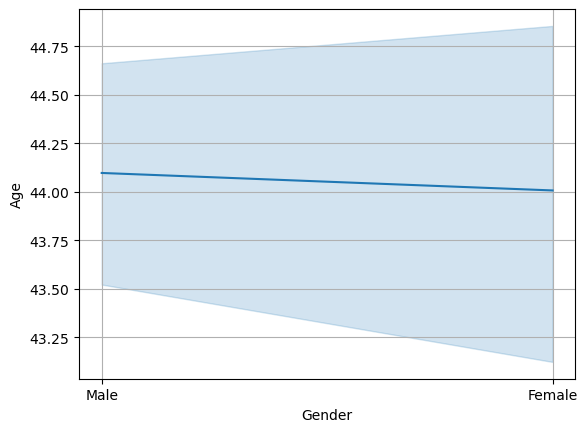

In [13]:
sns.lineplot(x = "Gender", y = "Age", data = df);
plt.grid(True)

##### 2. Bu grafikte yaş, cinsiyet ve aşışveriş yapılan ürün katogorisi acısından inceleyen bir grafik.

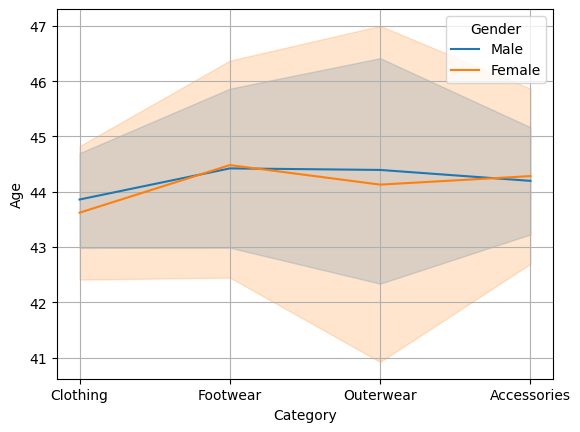

In [14]:
sns.lineplot(x = "Category", y = "Age", hue = "Gender", data = df);
plt.grid(True)

##### 3. Bu grafikte yaş, cinsiyet ve alınan ürün cinsi acısından inceleyen bir grafik.

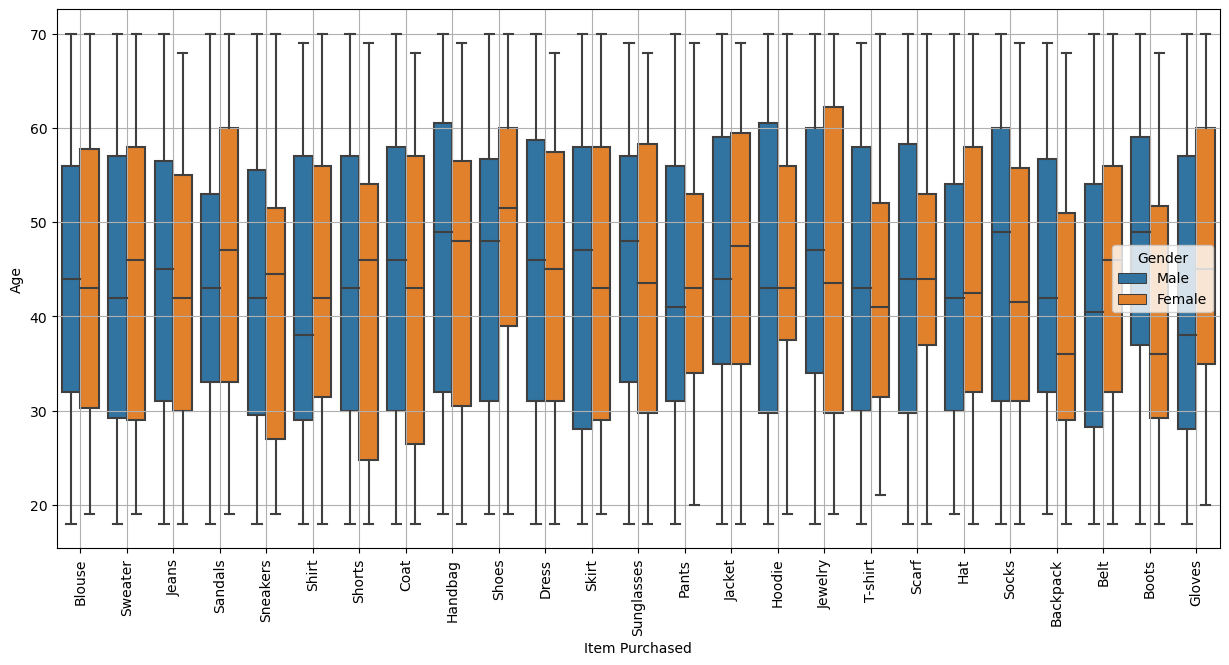

In [15]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "Item Purchased", y = "Age", hue = "Gender", data = df);
plt.grid(True)
plt.xticks(rotation =90);

##### 4. Ürün katogorileri ve her satıştan kazanılan ortalama parasını görselleştiren grafik.

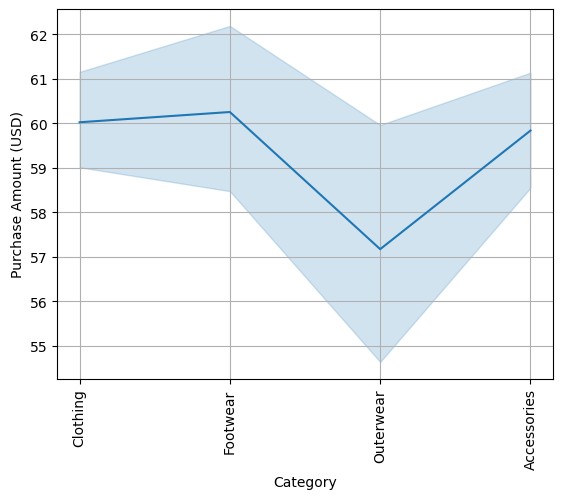

In [16]:
sns.lineplot(x = "Category", y = "Purchase Amount (USD)", data = df);
plt.grid(True)
plt.xticks(rotation =90);

##### 5. ürün katogorileri, her satış başına kazanılan para ve cinsiyet acısından inceleme.

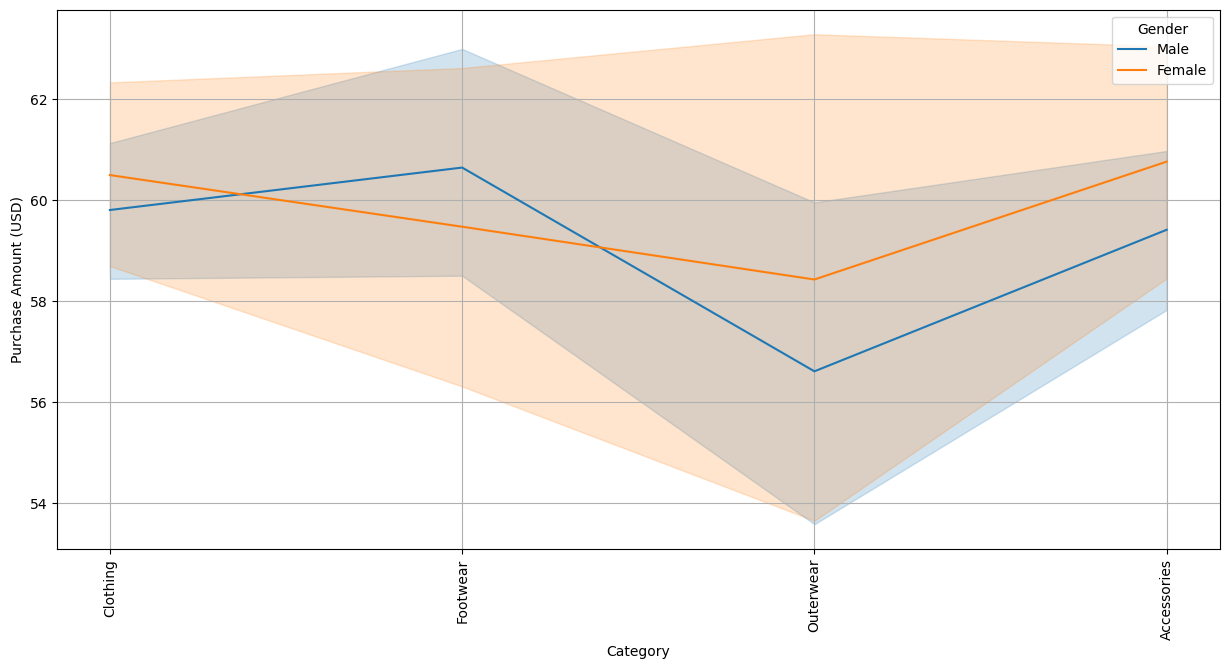

In [17]:
plt.figure(figsize=(15,7))
sns.lineplot(x = "Category", y = "Purchase Amount (USD)", hue = "Gender", data = df);
plt.grid(True)
plt.xticks(rotation =90);

##### 6. ürün cinsinde, her satış başına kazanılan para görselleştiren grafik.

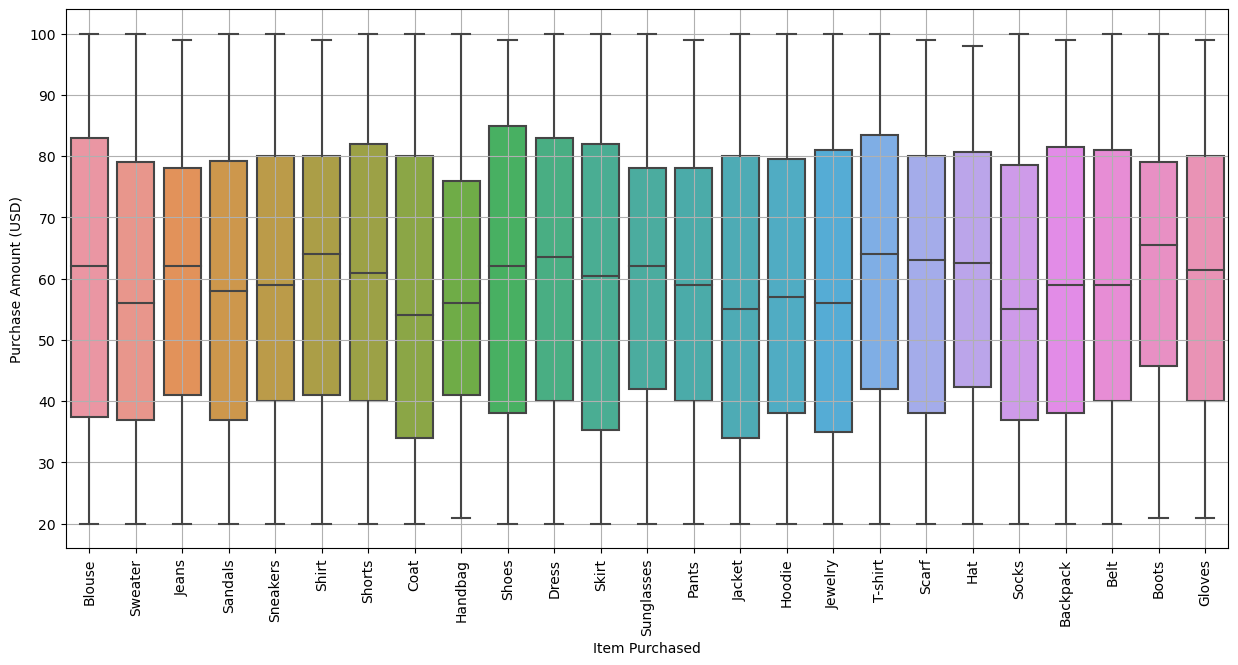

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "Item Purchased", y = "Purchase Amount (USD)",  data = df);
plt.grid(True)
plt.xticks(rotation =90);

##### 7. ürün cinsinde, her satış başına kazanılan para ve cinsiyet acısından görselleştiren grafik.

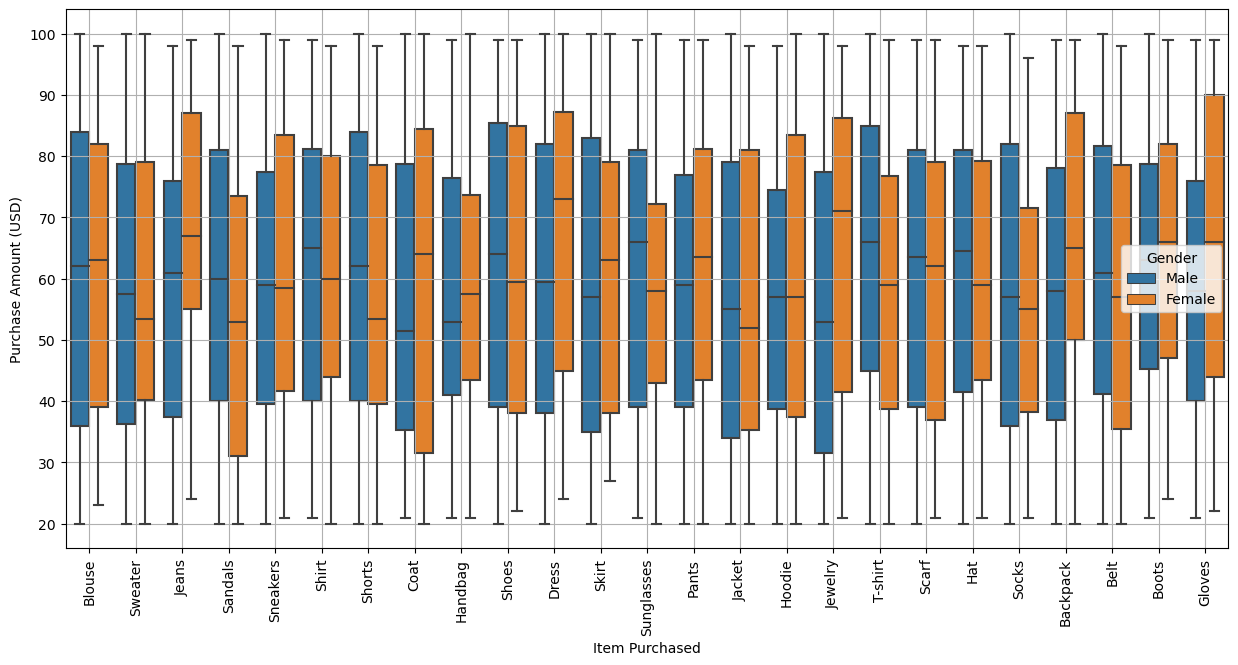

In [19]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "Item Purchased", y = "Purchase Amount (USD)", hue = "Gender", data = df);
plt.grid(True)
plt.xticks(rotation =90);

### Model kurma

##### 1. Model kurma.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Veri setini yükleyin
# df = pd.read_csv('your_dataset.csv')

# 1. Düşük Satışları Belirleme
threshold = df['Purchase Amount (USD)'].median()
df['Low Sales'] = df['Purchase Amount (USD)'] < threshold

# Özellikler ve hedef değişkenlerin ayrılması
X = df.drop(['Purchase Amount (USD)', 'Low Sales'], axis=1)
y = df['Low Sales']

# Kategorik ve sayısal özelliklerin ayrılması
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Ön işleme adımlarını tanımlama
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Model oluşturma ve eğitme
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitme
pipeline.fit(X_train, y_train)

# Test seti üzerinde değerlendirme
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.48      0.59      0.53       372
        True       0.52      0.41      0.46       408

    accuracy                           0.50       780
   macro avg       0.50      0.50      0.49       780
weighted avg       0.50      0.50      0.49       780



##### 2. Modele kampanya için tahmin çıkarım yaptırma.

In [25]:
# Eğitimli model ile düşük satış tahminleri yapma
df['Predicted Low Sales'] = pipeline.predict(X)

# Düşük satış oranı yüksek olan segmentleri belirleme
# Sezon, yaş, cinsiyet, kategori ve ürün bazında analiz
campaign_recommendations = df[df['Predicted Low Sales'] == True].groupby(['Season', 'Age', 'Gender', 'Category', 'Item Purchased']).size().reset_index(name='Count')

# En yüksek düşük satış oranına sahip segmentleri belirleme
recommendations = campaign_recommendations.sort_values(by='Count', ascending=False)

# Sonuçları yazdırma
print("Kampanya Önerileri:")
print(recommendations)

Kampanya Önerileri:
      Season  Age  Gender     Category Item Purchased  Count
1027  Summer   40    Male     Clothing          Pants      3
1246  Summer   65    Male     Clothing        Sweater      3
534   Spring   34    Male  Accessories        Jewelry      3
51      Fall   25    Male     Clothing          Skirt      3
147     Fall   37    Male     Clothing        Sweater      3
...      ...  ...     ...          ...            ...    ...
583   Spring   40    Male  Accessories       Backpack      1
582   Spring   40  Female    Outerwear         Jacket      1
581   Spring   40  Female     Clothing        T-shirt      1
580   Spring   40  Female     Clothing          Shirt      1
1676  Winter   70    Male     Footwear       Sneakers      1

[1677 rows x 6 columns]


##### 3. Dönemsel kampanya tahmini yaptırma.

In [26]:
# Eğitimli model ile düşük satış tahminleri yapma
df['Predicted Low Sales'] = pipeline.predict(X)

# Düşük satış oranı yüksek olan segmentleri belirleme
# Sezon, yaş, cinsiyet, kategori ve ürün bazında analiz
campaign_recommendations = df[df['Predicted Low Sales'] == True].groupby(['Season', 'Age', 'Gender', 'Category', 'Item Purchased']).size().reset_index(name='Count')

# Her sezondaki en yüksek düşük satış oranına sahip segmenti belirleme
seasonal_recommendations = campaign_recommendations.loc[campaign_recommendations.groupby('Season')['Count'].idxmax()]

# Sonuçları yazdırma
print("Kampanya Önerileri:")
print(seasonal_recommendations)


Kampanya Önerileri:
      Season  Age  Gender     Category Item Purchased  Count
51      Fall   25    Male     Clothing          Skirt      3
534   Spring   34    Male  Accessories        Jewelry      3
874   Summer   23  Female     Clothing         Shorts      3
1463  Winter   42    Male     Footwear        Sandals      3


Kampanya Önerileri ve Anlamları:
Fall (Sonbahar) Sezonu: 25 yaşındaki Male (Erkek) müşteriler, Clothing (Giyim) kategorisinde Skirt (Etek) ürününde düşük satışa sahip. Bu durum, bu müşteri segmentine yönelik bir kampanya düzenlenmesi gerektiğini gösterir. Örneğin, Sonbahar sezonunda erkek müşterilere yönelik etek ürünlerinde bir indirim veya özel bir kampanya yapılabilir.

Spring (İlkbahar) Sezonu: 34 yaşındaki Male (Erkek) müşteriler, Accessories (Aksesuarlar) kategorisinde Jewelry (Takı) ürününde düşük satışa sahip. Bu müşteri segmentine yönelik takı kategorisinde bir kampanya önerilebilir.

Summer (Yaz) Sezonu: 23 yaşındaki Female (Kadın) müşteriler, Clothing (Giyim) kategorisinde Shorts (Şort) ürününde düşük satışa sahip. Yaz sezonunda bu segmente yönelik bir şort kampanyası yapılabilir.

Winter (Kış) Sezonu: 42 yaşındaki Male (Erkek) müşteriler, Footwear (Ayakkabı) kategorisinde Sandals (Sandalet) ürününde düşük satışa sahip. Bu durumda, kış sezonunda erkek müşterilere yönelik sandaletlerde bir kampanya düzenlenebilir.

Sonuç:
Bu öneriler, her sezonda hangi müşteri segmentine yönelik kampanyalar düzenlenmesi gerektiğini gösterir. Bu tür hedefli kampanyalar, belirli segmentlerdeki düşük satışları artırmayı amaçlar. Kampanyalar, spesifik yaş, cinsiyet, ürün kategorisi ve satın alınan ürünlere odaklanarak daha etkili hale getirilebilir.

### Sonuç

- Bu proje kapsamında dönemsel ve ürün kategorisi bazlı ürün satışlarını inceleyerek hedefe yönelik kampanya stratejileri geliştirdik. İlk adımda, veriyi analiz ederek müşterilerin yaş, cinsiyet ve alışveriş davranışlarına dair önemli bulgular elde ettik.

- Veri görselleştirme aşamasında şu gözlemler dikkat çekiciydi:

1. Dış giyim alışverişi yapan kadın müşterilerin yaş ortalaması, erkeklere kıyasla daha düşük.
2. Çorap kategorisinde alışveriş yapan erkeklerin yaşı, kadınlara göre daha düşük.
3. Sırt çantası alan kadın müşterilerin yaşı, erkeklere göre daha düşük.
4. Kemer alan erkeklerin yaş ortalaması, kadınlardan daha düşük.
5. Genel olarak kadınların yaş ortalaması, erkeklere göre daha düşük.
6. Eldiven alışverişi yapan erkeklerin yaş ortalaması da kadınlara kıyasla daha düşük.
-  Ayrıca, ürün kategorileri açısından yapılan harcamalarda önemli farklılıklar gözlemlendi:

1.  Kadınlar, giyim kategorisinde daha fazla harcama yaparken erkekler ayakkabı kategorisinde daha fazla harcama yapıyor.
2.  Aksesuar kategorisinde ise kadınlar erkeklere göre daha fazla harcama yapıyor.
3.  Bu bulgular doğrultusunda, düşük satış oranlarına sahip segmentleri belirlemek ve bu segmentlere yönelik kampanya önerileri geliştirmek amacıyla bir model oluşturduk. Model, her sezonda en yüksek düşük satış oranına sahip segmentleri analiz ederek, bu segmentlere yönelik kampanya önerilerinde bulundu.

- Örneğin:

1. Sonbahar sezonunda, 25 yaşındaki erkek müşteriler için Giyim kategorisinde Etek ürününde düşük satışlar gözlemlendi. Bu nedenle, bu müşteri segmentine yönelik bir kampanya önerildi. ( Bu yapılan tahmin başarısının yüksekliği acısından koydum. erkekler neden etek alsın o satışı düşük görmüş ve kampanya ayarlamaya çalışmış.)
2. İlkbahar sezonunda, 34 yaşındaki erkek müşteriler için Aksesuarlar kategorisinde Takı ürününde düşük satışlar tespit edildi ve bu segmente yönelik bir kampanya planlandı.
3. Yaz sezonunda, 23 yaşındaki kadın müşteriler için Giyim kategorisinde Şort ürününde düşük satışlar saptandı ve bu müşteri segmentine yönelik bir kampanya önerisi yapıldı.
4. Kış sezonunda, 42 yaşındaki erkek müşteriler için Ayakkabı kategorisinde Sandalet ürününde düşük satışlar tespit edilerek bu segmente yönelik bir kampanya önerildi.

##### Sonuç olarak, bu proje, müşteri segmentasyonuna dayalı olarak özelleştirilmiş kampanyalar geliştirmenin önemini vurguladı. Müşteri davranışlarına dair elde edilen içgörüler, daha etkili pazarlama stratejileri oluşturmak ve satışları artırmak için yol gösterici oldu. Bu tür hedefli kampanyalar, belirli müşteri gruplarında satış performansını iyileştirme potansiyeline sahiptir.